# AMOL GUPTA - 19A2HP418


### Input File to Colab interface

In [1]:
from google.colab import files #to import files in google colab
uploaded = files.upload() #according to google colab interface files must be uploaded like this first

Saving Advertising.csv to Advertising.csv


In [2]:
import io #an input output library 
import pandas as pd #for loading files as data frames
import numpy as np #for arithmatic operations
np.set_printoptions(precision=4,linewidth=100) #to determine how various floating points and other objects are displayed
df2 = pd.read_csv(io.BytesIO(uploaded['Advertising.csv'])) #reading the dataset into a dataframe


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


### Checking and deleting Null/Missing Values

In [4]:

df2[df2.Day.isnull()] #identifying null values

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2
42,43,293.6,NaN,1.8,NaN,10.4
68,69,NaN,27.5,11.0,NaN,12.8


In [5]:
df2 = df2.dropna(subset = ['Day']) #delete Null value rows

In [6]:
df2[df2.Day.isnull()] #checking if null rows are deleted

,Sno,TV,Radio,Newspaper,Day,Sales


### Encoding DataFrame

In [7]:
df2['Day'].unique() ##gives unique values in the column

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [8]:
pd.get_dummies(df2['Day']) #converts category to indicator variables

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,1,0
198,1,0,0


In [27]:
categorical_features = ['Day']
X_features = ['TV', 'Radio', 'Newspaper', 'Day', 'Sales']

In [28]:
df2_encoded_df = pd.get_dummies(df2[X_features], columns = categorical_features) #adds category columns seperately

In [29]:
df2_encoded_df.columns #display new columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

In [30]:
X_features = df2_encoded_df.columns

In [31]:
df2_encoded_df.describe() # Descriptive Summary using describe function

,TV,Radio,Newspaper,Sales,Day_Holiday,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,14.102030,0.020305,0.766497,0.213198
std,85.439138,14.922793,20.972370,5.192302,0.141399,0.424137,0.410610
min,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,10.400000,0.000000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,12.900000,0.000000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,17.400000,0.000000,1.000000,0.000000
max,296.400000,49.600000,100.900000,27.000000,1.000000,1.000000,1.000000


### TWO MEANINGFUL VISUALIZATIONS

In [32]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
sales_by_day = df2.groupby('Day')['Sales'].mean().reset_index()
sales_by_day

,Day,Sales
0,Holiday,13.175000
1,Weekdays,14.033113
2,Weekend,14.438095


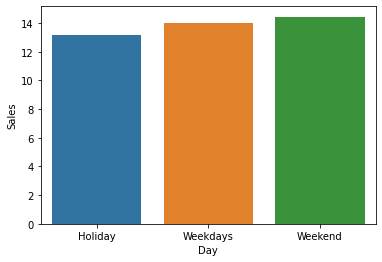

In [20]:
sn.barplot(x = 'Day', y = 'Sales', data = sales_by_day);

We can see that the most sales were observed in the Weekends 

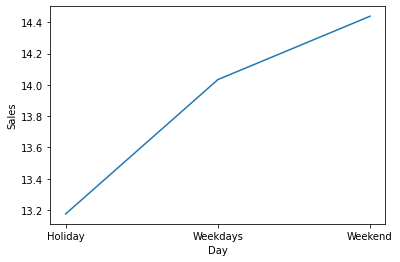

In [82]:
sn.lineplot(x = 'Day', y = 'Sales', data = sales_by_day)

In [41]:
df2_encoded_new = df2_encoded_df[['TV','Radio','Newspaper', 'Day_Weekend','Day_Weekdays','Day_Holiday']]

In [42]:
df2_encoded_new.head(5)

,TV,Radio,Newspaper,Day_Weekend,Day_Weekdays,Day_Holiday
0,230.1,37.8,69.2,1,0,0
1,44.5,39.3,45.1,0,1,0
2,17.2,45.9,69.3,0,1,0
3,151.5,41.3,58.5,0,1,0
4,180.8,10.8,58.4,0,1,0


### Train and Test

In [61]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant(df2_encoded_new)
Y = df2_encoded_df['Sales']
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.7, random_state = 51 )

### Model using Multiple Linear Regression Model

In [83]:
df2_model = sm.OLS(train_y, train_X).fit()
df2_model.summary2() #

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.736   
Dependent Variable:     Sales            AIC:                         956.3048
Date:                   2020-08-12 09:08 BIC:                         965.0647
No. Observations:       137              Log-Likelihood:              -475.15 
Df Model:               3                F-statistic:                 128.3   
Df Residuals:           134              Prob (F-statistic):          3.24e-39
R-squared (uncentered): 0.742            Scale:                       61.608  
----------------------------------------------------------------------------------
                  Coef.      Std.Err.       t        P>|t|       [0.025     0.975]
----------------------------------------------------------------------------------
TV                0.0427       0.0064     6.7138     0.0000      0.0301     0.0553
Radio             0.1665       0.0447     3.7216     0.0003      0.0780     0.2550
Newspaper         0.0658       0.0337     1.9510     0.0531     -0.0009     0.1326
------------------------------------------------------------------------------
Omnibus:                   1.400            Durbin-Watson:               1.618
Prob(Omnibus):             0.497            Jarque-Bera (JB):            0.978
Skew:                      0.171            Prob(JB):                    0.613
Kurtosis:                  3.234            Condition No.:               13   
==============================================================================

"""

### Residual Analysis

<Figure size 576x432 with 0 Axes>

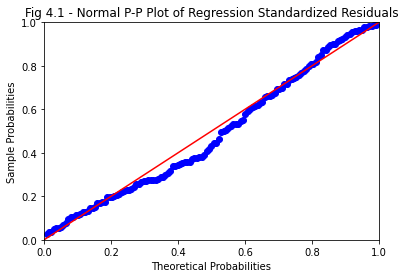

In [63]:
ad_sales_resid = df2_model.resid
probplot = sm.ProbPlot( ad_sales_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

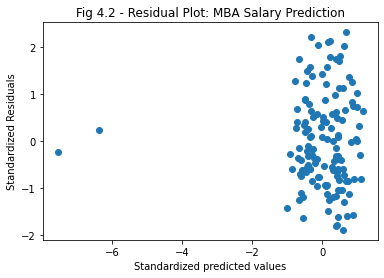

In [64]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter( get_standardized_values( df2_model.fittedvalues ),
get_standardized_values( ad_sales_resid ) )
plt.title( "Fig 4.2 - Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [65]:
from scipy.stats import zscore
df2_encoded_df['z_score_sales'] = zscore( df2_encoded_df.Sales )
df2_encoded_df[ (df2_encoded_df.z_score_sales > 3.0) | (df2_encoded_df.z_score_sales < -3.0) ]


,TV,Radio,Newspaper,Sales,Day_Holiday,Day_Weekdays,Day_Weekend,z_score_sales


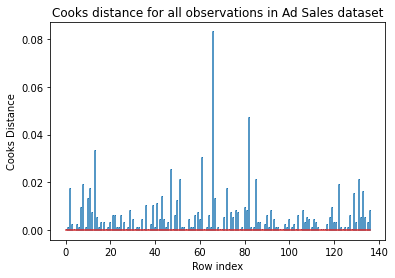

In [67]:
import numpy as np
ad_influence = df2_model.get_influence()
(c, p) = ad_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Fig 4.3 - Cooks distance for all observations in Ad Sales dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");

### Outlier Analysis

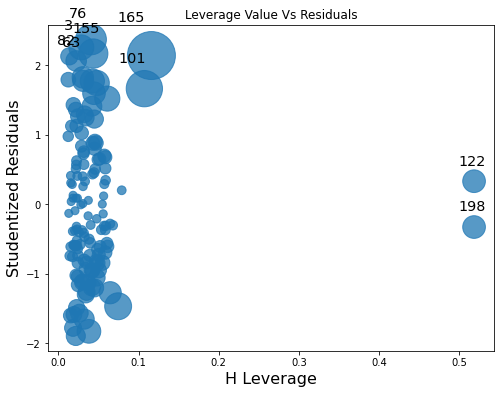

In [68]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( df2_model, ax = ax )
plt.title( "Leverage Value Vs Residuals with labels")
plt.show();

## RMSE for Validation Data

In [75]:
pred_y = df2_model.predict( test_X )
from sklearn.metrics import mean_squared_error
from sklearn import metrics
np.sqrt(mean_squared_error(test_y, pred_y))

5.7405909711037015

In [76]:
np.round( metrics.r2_score(pred_y, test_y), 2 )#measuring R square

-12.22

## Model 2

In [77]:
X_new_features = ["TV","Radio", "Newspaper"] # using only numeric variables for Model 2

In [79]:
train_X = train_X[X_new_features]
adv_model_2 = sm.OLS(train_y, train_X).fit()
adv_model_2.summary2()
# r2 is 0.74 means model explains 74%of the variability. This model is better
# Probability of F statistic is much lower, hence this model is statistically significant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.736   
Dependent Variable:     Sales            AIC:                         956.3048
Date:                   2020-08-12 06:33 BIC:                         965.0647
No. Observations:       137              Log-Likelihood:              -475.15 
Df Model:               3                F-statistic:                 128.3   
Df Residuals:           134              Prob (F-statistic):          3.24e-39
R-squared (uncentered): 0.742            Scale:                       61.608  
----------------------------------------------------------------------------------
                  Coef.      Std.Err.       t        P>|t|       [0.025     0.975]
----------------------------------------------------------------------------------
TV                0.0427       0.0064     6.7138     0.0000      0.0301     0.0553
Radio             0.1665       0.0447     3.7216     0.0003      0.0780     0.2550
Newspaper         0.0658       0.0337     1.9510     0.0531     -0.0009     0.1326
------------------------------------------------------------------------------
Omnibus:                   1.400            Durbin-Watson:               1.618
Prob(Omnibus):             0.497            Jarque-Bera (JB):            0.978
Skew:                      0.171            Prob(JB):                    0.613
Kurtosis:                  3.234            Condition No.:               13   
==============================================================================

"""

### Manual Calculations

In [80]:
manual_sales = 20*0.0427 + 10*0.1665 + 5*0.0658  # calculating sales for 20 tvs 10 radios and 5 newspaper
manual_sales

2.848